In [39]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from matplotlib import patches as patches
import cv2

import os

In [40]:
train_data = pd.read_json("C:/Users/Adam/Desktop/ISA/projekty/4_DL_project/training.json")
test_data = pd.read_json("C:/Users/Adam/Desktop/ISA/projekty/4_DL_project/test.json")
print(train_data.shape, test_data.shape)

(1208, 2) (120, 2)


In [41]:
test_data.head()

,image,objects
0,{'checksum': 'eea3bfd6a929bcb06f9786667cd3fbb2...,"[{'bounding_box': {'minimum': {'r': 576, 'c': ..."
1,{'checksum': '2d85fc8ffdb875bb569878243437e4f5...,"[{'bounding_box': {'minimum': {'r': 1048, 'c':..."
2,{'checksum': 'f7c02b6247f3ccfcd4a22c1f06e0c72c...,"[{'bounding_box': {'minimum': {'r': 979, 'c': ..."
3,{'checksum': '50634ef166ae993b4562b96f315ff6db...,"[{'bounding_box': {'minimum': {'r': 402, 'c': ..."
4,{'checksum': '74dd777a74e5a4b24aaee574a99e1459...,"[{'bounding_box': {'minimum': {'r': 314, 'c': ..."


In [42]:
print(test_data['image'].sample().values, "\n",
      test_data['objects'].sample().values)

[{'checksum': 'd029725a5eb5c5d45043af610f67304f', 'pathname': '/images/15a5849d-8bc7-4e01-938b-c1f55067787d.jpg', 'shape': {'r': 1383, 'c': 1944, 'channels': 3}}] 
 [list([{'bounding_box': {'minimum': {'r': 322, 'c': 1428}, 'maximum': {'r': 453, 'c': 1570}}, 'category': 'red blood cell'}, {'bounding_box': {'minimum': {'r': 211, 'c': 887}, 'maximum': {'r': 353, 'c': 1014}}, 'category': 'red blood cell'}, {'bounding_box': {'minimum': {'r': 89, 'c': 667}, 'maximum': {'r': 233, 'c': 793}}, 'category': 'red blood cell'}, {'bounding_box': {'minimum': {'r': 1184, 'c': 58}, 'maximum': {'r': 1312, 'c': 200}}, 'category': 'red blood cell'}, {'bounding_box': {'minimum': {'r': 68, 'c': 522}, 'maximum': {'r': 208, 'c': 664}}, 'category': 'red blood cell'}, {'bounding_box': {'minimum': {'r': 356, 'c': 1290}, 'maximum': {'r': 494, 'c': 1418}}, 'category': 'red blood cell'}, {'bounding_box': {'minimum': {'r': 239, 'c': 416}, 'maximum': {'r': 369, 'c': 558}}, 'category': 'red blood cell'}, {'bounding_b

In [43]:
# creating dataframe with each bounding box as datapoint
test_image_list = [] # pathname
width = []            # width of the image
height = []           # height of the image
    # position of the bbox
y_max = []
y_min = []
x_max = []
x_min = []
    # label
class_label = []

for i in range(0,test_data.shape[0]):
    for j in range(0,len(test_data["objects"][i])):
        
        test_image_list.append(test_data["image"][i]["pathname"])
        
        width.append(test_data["image"][i]["shape"]["c"])
        height.append(test_data["image"][i]["shape"]["r"])
        
        y_max.append(test_data["objects"][i][j]["bounding_box"]["maximum"]["r"])
        y_min.append(test_data["objects"][i][j]["bounding_box"]["minimum"]["r"])
        x_max.append(test_data["objects"][i][j]["bounding_box"]["maximum"]["c"])
        x_min.append(test_data["objects"][i][j]["bounding_box"]["minimum"]["c"])
        
        class_label.append(test_data["objects"][i][j]["category"])
        
test_df = pd.DataFrame()

test_df["filepath"] = test_image_list
test_df["width"] = width
test_df["height"] = height
test_df["class_label"] = class_label
test_df["xmin"] = x_min
test_df["ymin"] = y_min
test_df["xmax"] = x_max
test_df["ymax"] = y_max

test_df.head()

,filepath,width,height,class_label,xmin,ymin,xmax,ymax
0,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1944,1383,red blood cell,1744,576,1883,708
1,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1944,1383,red blood cell,1249,863,1373,977
2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1944,1383,red blood cell,1573,210,1711,335
3,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1944,1383,red blood cell,1124,1017,1253,1142
4,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1944,1383,red blood cell,1655,572,1763,695


In [44]:
test_df["filepath"].nunique()

120

In [45]:
test_df["class_label"].value_counts()

red blood cell    5614
ring               169
trophozoite        111
gametocyte          12
schizont            11
difficult            5
Name: class_label, dtype: int64

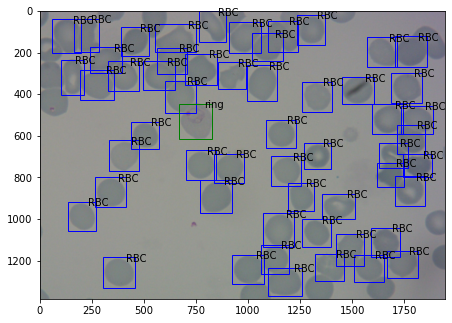

In [51]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('images/03be08c8-2cf3-4de6-8ac6-5f7817a6a643.jpg')
plt.imshow(image)


# iterating over the image for different objects
for _, row in test_df[test_df.filepath == "/images/03be08c8-2cf3-4de6-8ac6-5f7817a6a643.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    # assign different color to different classes of objects
    if row.class_label == 'ring':
        edgecolor = 'g'
        ax.annotate('ring', xy=(xmax-40,ymin+20))
    elif row.class_label == 'red blood cell':
        edgecolor = 'b'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.class_label == 'trophozoite':
        edgecolor = 'r'
        ax.annotate('trophozoite', xy=(xmax-40,ymin+20))
    elif row.class_label == 'gametocyte':
        edgecolor = 'm'
        ax.annotate('gametocyte', xy=(xmax-40,ymin+20))
    elif row.class_label == 'schizont':
        edgecolor = 'c'
        ax.annotate('schizont', xy=(xmax-40,ymin+20))
    elif row.class_label == 'difficult':
        edgecolor = 'y'
        ax.annotate('difficult', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)